### Install & load dependancies

In [98]:
%pip install scikit-learn
%pip install xgboost
%pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached lightgbm-4.1.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightgbm: filename=lightgbm-4.1.0-py3-none-macosx_13_0_arm64.whl size=1377023 sha256=b91b108e30a13065cb498b60cc2b5c1e6e9950818c61beeb79ead5c417abc67a
  Stored in directory: /Users/naowak/Library/Caches/pip/wheels/d8/44/99/0cd75089a1b4c9c309731bb6cf41747a792516643e67d8ee52
Successfully built lightgbm

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip instal

In [99]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsRegressor

### Explore data

In [12]:
df = pd.read_csv('./data-csv/tchatche_split_x.csv')
print(df.columns)
df.head(2)

Index(['file_name', 'rating', 'duration', 'transcript', 'speed',
       'intensity_avg', 'intensity_std', 'intensity_min', 'intensity_max',
       'pitch_avg', 'pitch_std', 'pitch_min', 'pitch_max', 'mfcc0_avg',
       'mfcc0_std', 'mfcc0_min', 'mfcc0_max', 'mfcc1_avg', 'mfcc1_std',
       'mfcc1_min', 'mfcc1_max', 'mfcc2_avg', 'mfcc2_std', 'mfcc2_min',
       'mfcc2_max'],
      dtype='object')


,file_name,rating,duration,transcript,speed,intensity_avg,intensity_std,intensity_min,intensity_max,pitch_avg,...,mfcc0_min,mfcc0_max,mfcc1_avg,mfcc1_std,mfcc1_min,mfcc1_max,mfcc2_avg,mfcc2_std,mfcc2_min,mfcc2_max
0,QG_20230404144514_1_1071010_1342160_1283_32095...,7,30.811774,La parole est à Madame Sandra Rogol pour le gr...,21.420383,61.986624,8.011046,38.471184,74.344699,277.552922,...,332.228388,1682.642461,367.191824,133.774305,-70.096659,608.373617,-189.272256,80.04866,-400.907286,53.735662
1,QG_20230404144514_1_1071010_1342160_39370_4386...,8,4.493384,"En fait, toutes les personnes que vos réformes...",133.529662,58.555230,11.130439,40.060172,74.633179,257.859616,...,357.024724,1498.965527,380.027899,131.393800,-67.816469,578.667946,-193.903590,70.65459,-363.756655,-18.703706


In [6]:
df.describe()

,rating,duration,speed,intensity_avg,intensity_std,intensity_min,intensity_max,pitch_avg,pitch_std,pitch_min,...,mfcc0_min,mfcc0_max,mfcc1_avg,mfcc1_std,mfcc1_min,mfcc1_max,mfcc2_avg,mfcc2_std,mfcc2_min,mfcc2_max
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,3.531034,58.534397,104.363607,60.510889,10.216059,31.271345,75.182756,221.803485,43.289279,90.061008,...,187.876835,1671.040387,347.240966,128.250740,-98.381715,610.114773,-163.243808,73.804371,-407.654348,69.950833
std,2.031198,40.255067,63.615207,2.296742,1.752652,28.233329,1.108331,49.976910,11.078251,19.197950,...,982.849190,83.275578,28.078106,16.293055,53.360272,39.972902,33.436369,6.726818,36.763126,42.986532
min,1.000000,4.350917,2.485380,52.248086,6.571588,-300.000000,72.006622,128.215450,16.488763,74.943318,...,-11400.000000,1471.620525,254.365324,93.608291,-219.439515,503.641815,-268.505027,54.821149,-498.894477,-82.924976
25%,2.000000,23.167747,50.756326,59.188348,9.178059,29.699904,74.474318,185.082673,35.482670,77.088256,...,166.525783,1613.292883,327.802514,117.860193,-136.572049,582.630848,-184.320257,69.302828,-429.668942,45.122826
50%,3.000000,46.436327,82.082331,60.795970,9.885761,33.772271,75.201177,213.121911,42.009080,82.964534,...,258.151734,1670.834791,346.531265,128.977005,-94.920041,609.833384,-162.820776,74.178635,-407.073981,68.479602
75%,5.000000,97.693894,164.104607,62.161681,11.130439,37.694156,75.817693,261.527481,50.137770,94.558878,...,365.473952,1718.402038,367.191824,138.334953,-64.130640,632.181484,-141.559141,78.418833,-382.714640,93.858597
max,8.000000,131.852212,236.742821,64.600536,21.189579,50.711066,78.647919,351.037469,70.518481,182.691944,...,771.744579,1949.596098,406.028633,168.247909,99.306013,704.298312,-77.431555,95.579647,-326.342915,190.773261


<Axes: >

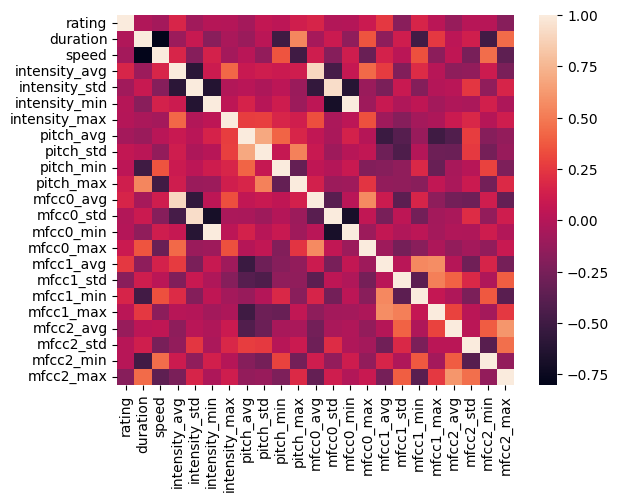

In [11]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_df.corr()
sns.heatmap(corr)

In [15]:
corr['rating']

rating           1.000000
duration        -0.018827
speed           -0.069225
intensity_avg    0.169520
intensity_std   -0.078758
intensity_min    0.002572
intensity_max    0.000616
pitch_avg       -0.063495
pitch_std        0.058452
pitch_min        0.033646
pitch_max        0.127026
mfcc0_avg        0.160200
mfcc0_std       -0.011587
mfcc0_min       -0.004338
mfcc0_max        0.096406
mfcc1_avg        0.249755
mfcc1_std       -0.175813
mfcc1_min        0.157914
mfcc1_max        0.025623
mfcc2_avg       -0.123120
mfcc2_std        0.014314
mfcc2_min        0.012215
mfcc2_max       -0.187372
Name: rating, dtype: float64

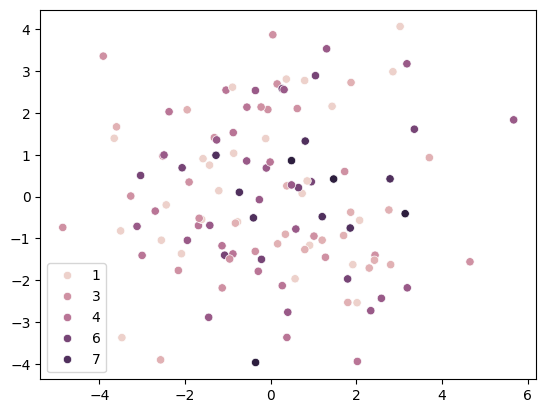

<Axes: >

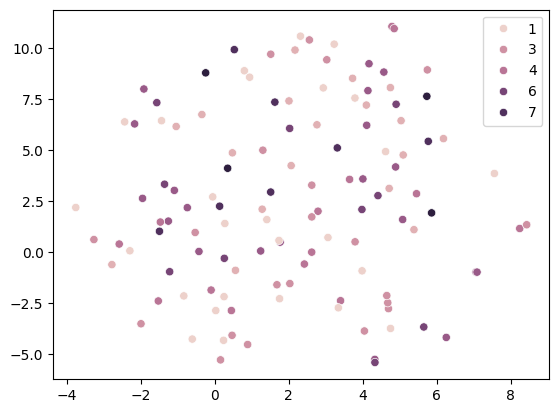

In [65]:
# drop the 'rating' column
X = df.drop(['rating', 'file_name', 'transcript'], axis=1)

# standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get outlier indexes and remove
outlier_indexes = np.where((X_scaled > 3) | (X_scaled < -3))
X_clean = np.delete(X_scaled, outlier_indexes, axis=0)
rating = np.delete(df.rating.values, outlier_indexes, axis=0)

# perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

# plot the PCA results with color based on rating
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=rating)
plt.show()

# plot the tsne results with color based on rating
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_clean)
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=rating)


### Try with all columns

In [100]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, rating, test_size=0.2, random_state=42)

In [67]:
# train an XGBoost model on the training set
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}
model = xgb.train(params, dtrain)

# use the trained model to predict the ratings for the testing set
y_pred = model.predict(dtest)

# evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# evaluate the performance of the model using mean squared error
median = [np.median(y_train) for _ in range(len(y_test))]
mse = mean_squared_error(y_test, median)
print('Mean squared error compared to median:', mse)

Mean squared error: 3.9807872005688765
Mean squared error compared to median: 4.208333333333333


In [75]:
# train a KNN model on the training set
knn = KNeighborsRegressor(n_neighbors=17)
knn.fit(X_train, y_train)

# use the trained model to predict the ratings for the testing set
y_pred = knn.predict(X_test)

# evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 4.163494809688582


In [101]:
# train an LGBMClassifier model on the training set
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

# use the trained model to predict the ratings for the testing set
y_pred = lgbm.predict(X_test)

# evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 96, number of used features: 22
[LightGBM] [Info] Start training from score -1.519826
[LightGBM] [Info] Start training from score -1.925291
[LightGBM] [Info] Start training from score -1.731135
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -2.618438
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start training from score -3.178054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### Try with only columns correlated to more than 0.15

In [92]:
abs_corr = corr['rating'].abs()
corr_features = list(abs_corr[abs_corr > 0.2].index)
corr_features.remove('rating')
df_clean = pd.DataFrame(X_clean, columns=X.columns)
df_clean_corr = df_clean[corr_features]
df_clean_corr.head(2)

,mfcc1_avg
0,0.713012
1,1.171752


In [93]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_clean_corr, rating, test_size=0.2, random_state=42)

In [94]:
# train an XGBoost model on the training set
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}
model = xgb.train(params, dtrain)

# use the trained model to predict the ratings for the testing set
y_pred = model.predict(dtest)

# evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# evaluate the performance of the model using mean squared error
median = [np.median(y_train) for _ in range(len(y_test))]
mse = mean_squared_error(y_test, median)
print('Mean squared error compared to median:', mse)

Mean squared error: 3.4646626786398804
Mean squared error compared to median: 4.208333333333333


In [91]:
list(zip(y_test, y_pred))

[(2, 4.131617),
 (4, 2.8543017),
 (6, 3.769505),
 (6, 4.0823827),
 (3, 3.1402125),
 (7, 3.234236),
 (6, 4.537798),
 (3, 3.0139732),
 (1, 3.5052524),
 (2, 3.396668),
 (3, 4.053),
 (2, 3.0498538),
 (3, 3.0401158),
 (1, 4.3896174),
 (1, 3.769505),
 (1, 3.3294845),
 (5, 4.003035),
 (7, 4.1215687),
 (5, 3.1838565),
 (4, 2.7272468),
 (2, 3.9077868),
 (1, 3.5052524),
 (5, 3.7559001),
 (5, 4.0213356)]